https://github.com/Lifelong-Robot-Learning/LIBERO

In [7]:
# !pip install --quiet mediapy

In [8]:
import mediapy

In [9]:
import os
from libero.libero import benchmark
from libero.libero.envs import OffScreenRenderEnv
from libero.libero import get_libero_path

In [10]:
benchmark_dict = benchmark.get_benchmark_dict()
task_suite_name = "libero_10" # can also choose libero_spatial, libero_object, etc.
task_suite = benchmark_dict[task_suite_name]()

[info] using task orders [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## LIBERO Task id 별 이미지 확인해보기

In [11]:
# retrieve a specific task
task_id = 5

In [12]:

task = task_suite.get_task(task_id)
task_name = task.name

task_description = task.language
task_bddl_file = os.path.join(get_libero_path("bddl_files"), task.problem_folder, task.bddl_file)
print(f"[info] task_name : {task_name} \n retrieving task {task_id} from suite {task_suite_name}, \n the " + \
      f"language instruction : {task_description}, and the bddl file is {task_bddl_file}")


env_args = {
    "bddl_file_name": task_bddl_file,
    "camera_heights": 512,
    "camera_widths": 512
}

env = OffScreenRenderEnv(**env_args)
env.reset()

init_states = task_suite.get_task_init_states(task_id) # for benchmarking purpose, we fix the a set of initial states
obs = env.set_init_state(init_states[0])
images = [obs["agentview_image"][::-1]]


dummy_action = [0.] * 7
for _ in range(50):
    obs, reward, done, info = env.step(dummy_action)
    # 상하 반전
    flipped_image = obs["agentview_image"][::-1]
    images.append(flipped_image)
    
    
# images = np.concatenate(images, axis=1)
# cv2.imwrite(f"benchmark_tasks/{task.problem}-{task.language}.png", images[::-1, :, ::-1])
env.close()

[Warning]: datasets path /home/khw/VLA/LIBERO/LIBERO/libero/libero/../datasets does not exist!
[info] task_name : STUDY_SCENE1_pick_up_the_book_and_place_it_in_the_back_compartment_of_the_caddy 
 retrieving task 5 from suite libero_10, 
 the language instruction : pick up the book and place it in the back compartment of the caddy, and the bddl file is /home/khw/VLA/LIBERO/LIBERO/libero/libero/./bddl_files/libero_10/STUDY_SCENE1_pick_up_the_book_and_place_it_in_the_back_compartment_of_the_caddy.bddl
[Warning]: datasets path /home/khw/VLA/LIBERO/LIBERO/libero/libero/../datasets does not exist!


""

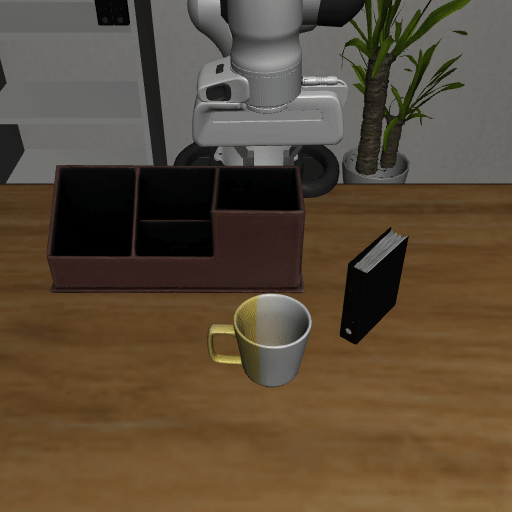

In [13]:
mediapy.show_video(images, fps=10, codec='gif')